#Frame Seperation

In [ ]:
import cv2 #Import cv2 library to video and image processing
import os #Import os lib for the file operations
import random #Import random lib to choose random frames
import matplotlib.pyplot as plt #Import matplotlib for visualization of sample frames
from google.colab import files #To download the outputs

In [ ]:
def spiltVideointoFrame(videoPath, savePath = '', imgName='frame'):#Define a function to split video to frames
    cap = cv2.VideoCapture(videoPath)#Capture the video and put it in a variable 
    count = 0 #Define this variable to count how many frames the video consists
    print('Reading...')

    while True:#To create a infinite loop, this loop will be broken when the frames are consumed
        success,image = cap.read()#To read the next frame
        if success == False: break #To break the loop when the frames are consumed
        count += 1 #Add 1 in each loop for labeling the frames
        savePath_copy = os.path.join(savePath, imgName+str(count)+'.jpg')#Path for the each frame in order
        cv2.imwrite(savePath_copy, image) #To write each frame to the given path
    print('{} frames read'.format(count))#Print the number of the frames that given video consist of

<h3>Downloading the Data</h3>

In [ ]:
VIDEO_name = "video.avi" #Define this variable to put the video which will be downloaded

adress = 'https://ndownloader.figshare.com/files/16407260';#Took the adress of the video
!rm "{VIDEO_name}";#To delete the video if it is already exists
!wget -q -O "{VIDEO_name}" "{adress}";#To download the video and put it in VIDEO_name variable

rm: cannot remove 'video.avi': No such file or directory


<h4>Run the Function</h4>

In [ ]:
DIR_name = 'frames' #Name for the output file
!mkdir "{DIR_name}" #Create a file for the outputs

spiltVideointoFrame(videoPath = VIDEO_name, savePath = DIR_name, imgName='frame')#Run the function

Reading...
600 frames read


<h4>Download the Outputs</h4>

In [ ]:
if input("Download Outputs(y/n):") == 'y': #Download option for output file
    ZIP_name = DIR_name + ".zip" #Create a zip name
    !zip -q -r "{ZIP_name}" "{DIR_name}" #Convert the file to zip to be downloadable
    files.download(ZIP_name) #Download the outputs
else:
    print("Outputs are not be downloaded...")

Download Outputs(y/n):y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h4>Sample Frames</h4>

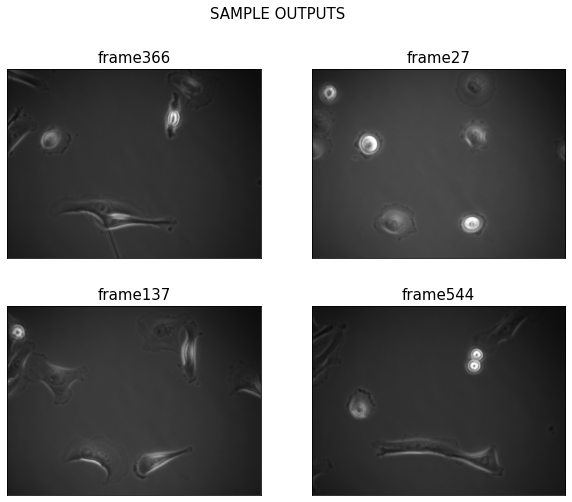

In [ ]:
img_paths = os.listdir(DIR_name) #Take the outputs' path

fig, axs = plt.subplots(2,2,figsize=(10,8)) #Create a canvas
fig.suptitle("SAMPLE OUTPUTS",fontsize=15) #Crate a title
for i in range(2):
    for j in range(2):
        img_path = random.choice(img_paths) #Choose a random frame
        axs[i,j].imshow(cv2.cvtColor(cv2.imread(os.path.join(DIR_name,
                                                             img_path)),
                                     cv2.COLOR_BGR2RGB));#Show the chosen frame
        axs[i,j].set_title(img_path[:-4],fontsize=15) #Title of chosen frame
        plt.setp(axs[i,j].get_xticklabels(), visible=False) #To delete the labels of x axis 
        plt.setp(axs[i,j].get_yticklabels(), visible=False) #To delete the labels of y axis 
        axs[i,j].tick_params(axis='both', which='both', length=0) #To delete the ticks of both axis